In [0]:
import numpy as np
import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import multivariate_normal
import math
import array


In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
#for x in range(len(y_train)):
 # print(y_train[x]) 

 #array = np.arange(20).reshape(4,5)
#array
 X_train[1].shape

(28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

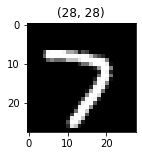

In [0]:

sample = X_test[17]
plt.figure(figsize=(3, 2))
plt.title(sample.shape)
plt.imshow(sample, cmap='gray')
plt.show()



In [0]:
#sigma = np.array([[0.7, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0],
                # [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0,0]
          # ])
# mean vector

Adaptation et essai


In [0]:
#ess c'est la structure qu'on veut reproduire
ess=np.zeros(shape=(28,28))
for j in range(28):
  if j<7:
    noise=np.random.uniform(0,0.7,28)
  if j>7 and j<14:
    noise=np.random.uniform(0.7,1,28)
  if j>15 and j<20:
    noise=np.random.uniform(0,0.4,28)
  if j>20:
    noise=np.random.uniform(0,0.7,28)
  ess[j]=noise*(3*j+1)/(28*3)


In [0]:
ess

array([[3.93571213e-03, 2.66502197e-03, 1.64667673e-03, 6.63633554e-03,
        4.72622913e-03, 4.04437884e-03, 6.37110898e-03, 7.53742809e-03,
        9.31420492e-04, 1.23825498e-03, 2.37875747e-03, 8.06875600e-03,
        6.49333927e-03, 3.58982087e-03, 8.22894905e-03, 7.72363035e-03,
        8.19206192e-03, 2.53742281e-03, 7.68639011e-03, 7.00933708e-03,
        7.24760267e-03, 8.19896053e-04, 5.63779712e-03, 8.07666185e-04,
        3.46735689e-03, 5.95824380e-04, 2.21231048e-03, 3.47344268e-03],
       [2.32286240e-02, 8.48458570e-03, 2.99612738e-03, 2.77136816e-02,
        7.20598852e-03, 8.58776304e-03, 1.15212093e-02, 2.86656234e-02,
        2.25095940e-02, 2.89057825e-02, 1.09276011e-02, 1.46887632e-02,
        1.81938828e-02, 2.13633431e-02, 2.47606387e-02, 1.25072068e-02,
        3.27480979e-02, 3.14009812e-02, 2.14423216e-02, 5.89656271e-03,
        1.19462106e-02, 9.10239996e-03, 1.01307572e-02, 2.40404953e-02,
        1.69659583e-02, 4.80779160e-03, 2.79545223e-02, 2.28512

In [0]:

A_train= np.zeros(shape=(60000,28,28))
for j in range(60000):
  noise=[]
  for i in range(28):
    noise.append(np.random.normal(0,0.1,28))
  A_train[j]=ess+np.array(noise)

In [0]:
A_train.shape

(60000, 28, 28)

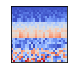

In [0]:
plt.figure(figsize=(5, 4))
for i in range(1):
    plt.subplot(4, 5, i+1)
    plt.imshow(ess, cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

Plot des images dans train

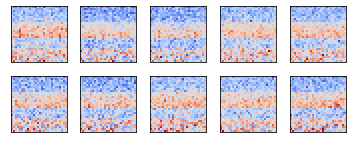

In [0]:
plt.figure(figsize=(5,4))
for i in range(10):
    plt.subplot(4,5, i+1)
    plt.imshow(A_train[i], cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [0]:
A_test= np.zeros(shape=(10000,28,28))

for j in range(10000):
  noise=[]
  for i in range(28):
    noise.append(np.random.normal(0,0.1,28))
  A_test[j]=ess+np.array(noise)

In [0]:
A_test.shape

(10000, 28, 28)

In [0]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [0]:
generator = Sequential([
    Dense(128, input_shape=(100,)),
    LeakyReLU(alpha=0.01),
    Dense(784),
    Activation('tanh')
], name='generator')

generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
_________________________________________________________________
activation_3 (Activation)    (None, 784)               0         
Total params: 114,064
Trainable params: 114,064
Non-trainable params: 0
_________________________________________________________________


In [0]:
discriminator = Sequential([
    Dense(128, input_shape=(784,)),
    LeakyReLU(alpha=0.01),
    Dense(1),
    Activation('sigmoid')
], name='discriminator')

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [0]:
# maintain the same shared weights with the generator and the discriminator.
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator (Sequential)       (None, 784)               114064    
_________________________________________________________________
discriminator (Sequential)   (None, 1)                 100609    
Total params: 214,673
Trainable params: 214,673
Non-trainable params: 0
_________________________________________________________________


In [0]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [0]:


make_trainable(discriminator, False)
discriminator.summary()



Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 0
Non-trainable params: 100,609
_________________________________________________________________


In [0]:
make_trainable(discriminator, True)
discriminator.summary()


Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [0]:
def make_simple_GAN(sample_size, 
                    g_hidden_size, 
                    d_hidden_size, 
                    leaky_alpha, 
                    g_learning_rate,
                    d_learning_rate):
    K.clear_session()
    
    generator = Sequential([
        Dense(g_hidden_size, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(784),        
        Activation('tanh')
    ], name='generator')    

    discriminator = Sequential([
        Dense(d_hidden_size, input_shape=(784,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')    
    
    gan = Sequential([
        generator,
        discriminator
    ])
    
    discriminator.compile(optimizer=Adam(lr=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(lr=g_learning_rate), loss='binary_crossentropy')
    
    return gan, generator, discriminator

In [0]:
def preprocess(x):    
    x = x.reshape(-1, 784) # 784=28*28
    #x = np.float64(x)
    #x = (x / 255 - 0.5) * 2
    #x = np.clip(x, -1, 1)
    return x

In [0]:
A_train_real = preprocess(A_train)
A_test_real  = preprocess(A_test)

In [0]:
def deprocess(x):
    #x = (x / 2 + 1) * 255
    #x = np.clip(x, 0, 255)
    #x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

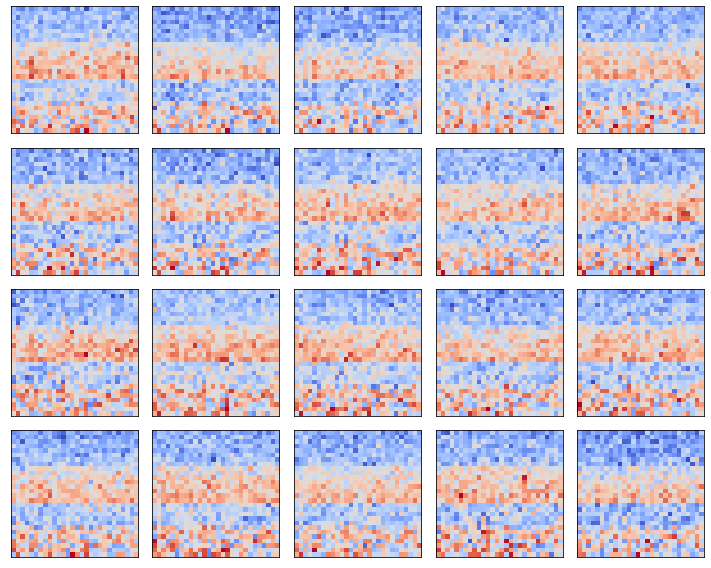

In [0]:
plt.figure(figsize=(10, 8))
for i in range(20):
    img = deprocess(A_train_real[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [0]:
 def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])


In [0]:
# hyperparameters
sample_size     = 100     # latent sample size (i.e., 100 random numbers)
g_hidden_size   = 128
d_hidden_size   = 128
leaky_alpha     = 0.01
g_learning_rate = 0.0001  # learning rate for the generator
d_learning_rate = 0.001   # learning rate for the discriminator
epochs          = 100
batch_size      = 64      # train batch size
eval_size       = 16      # evaluate size
smooth          = 0.1

# labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(
    sample_size, 
    g_hidden_size, 
    d_hidden_size, 
    leaky_alpha, 
    g_learning_rate,
    d_learning_rate)

losses = []
for e in range(epochs):
    for i in range(len(A_train_real)//batch_size):
        # real MNIST digit images
        A_batch_real = A_train_real[i*batch_size:(i+1)*batch_size]
        
        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        A_batch_fake = generator.predict_on_batch(latent_samples)
        
        # train the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(A_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(A_batch_fake, y_train_fake)

        # train the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)
    
    # evaluate
    A_eval_real = A_test_real[np.random.choice(len(A_test_real), eval_size, replace=False)]
    
    latent_samples = make_latent_samples(eval_size, sample_size)
    A_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss  = discriminator.test_on_batch(A_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(A_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!
    
    losses.append((d_loss, g_loss))
    
    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(
        e+1, epochs, d_loss, g_loss))

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch:   1/100 Discriminator Loss: 0.2075 Generator Loss: 5.1602
Epoch:   2/100 Discriminator Loss: 0.2890 Generator Loss: 4.0366
Epoch:   3/100 Discriminator Loss: 0.9183 Generator Loss: 1.3533
Epoch:   4/100 Discriminator Loss: 1.0230 Generator Loss: 1.1690
Epoch:   5/100 Discriminator Loss: 1.3099 Generator Loss: 1.1186
Epoch:   6/100 Discriminator Loss: 0.8821 Generator Loss: 1.1837
Epoch:   7/100 Discriminator Loss: 0.7540 Generator Loss: 1.8981
Epoch:   8/100 Discriminator Loss: 1.2096 Generator Loss: 1.1042
Epoch:   9/100 Discriminator Loss: 0.8806 Generator Loss: 1.2027
Epoch:  10/100 Discriminator Loss: 1.2068 Generator Loss: 0.9779
Epoch:  11/100 Discriminator Loss: 1.1565 Generator Loss: 0.9532
Epoch:  12/100 Discriminator Loss: 1.1345 Generator Loss: 1.0305
Epoch:  13/100 Discriminator Loss: 1.4579 Generator Loss: 0.8058
Epoch:  14/100 Discriminator Loss: 1.1349 Generator Loss: 1.0021
Epoch:  15/100 Discriminator Loss: 0.9942 Generator Loss: 1.0167
Epoch:  16/100 Discrimina

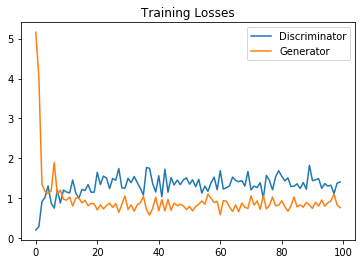

In [0]:
losses = np.array(losses)

fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

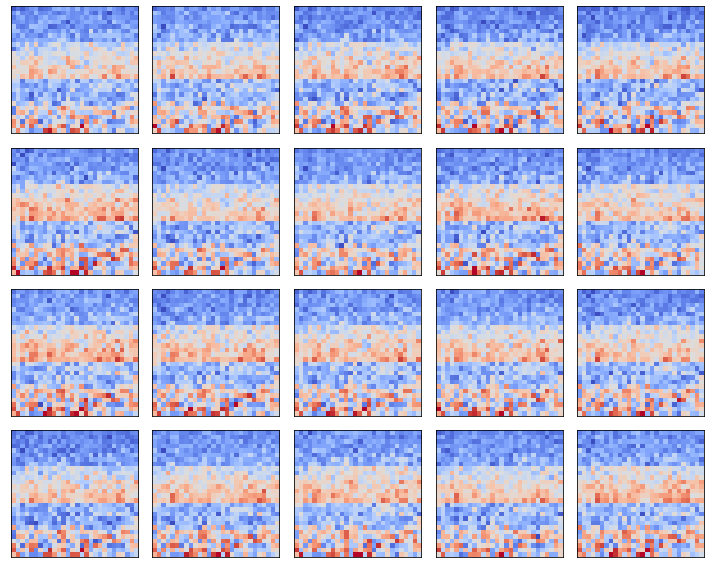

In [0]:
latent_samples = make_latent_samples(20, sample_size)
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(10, 8))
for i in range(20):
    img = deprocess(generated_digits[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

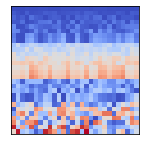

In [0]:
plt.figure(figsize=(10, 8))
for i in range(1):
    plt.subplot(4, 5, i+1)
    plt.imshow(ess, cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

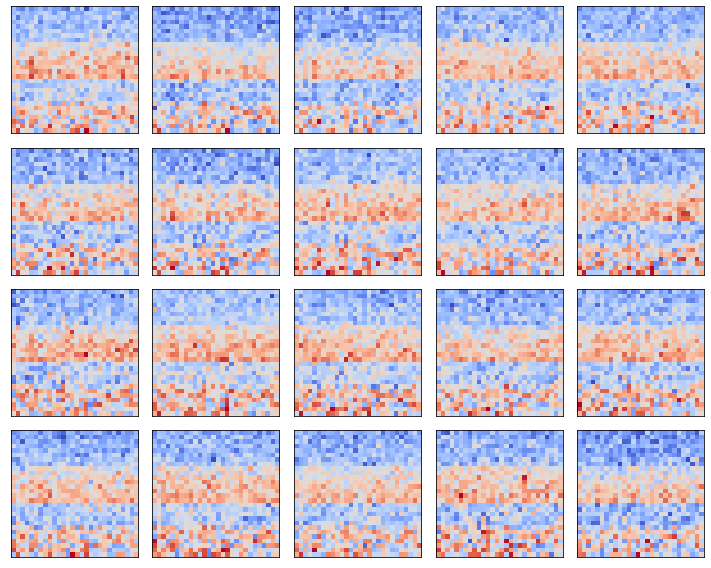

In [0]:
plt.figure(figsize=(10, 8))
for i in range(20):
    img = deprocess(A_train_real[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()